In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [155]:
prices = np.arange(30)
dates = np.arange(np.datetime64('2017-01-01'), np.datetime64('2017-01-'+str(len(prices)+1)))
dates

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
       '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
       '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
       '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
       '2017-01-29', '2017-01-30'], dtype='datetime64[D]')

In [156]:
np.arange(10//2)

array([0, 1, 2, 3, 4])

In [157]:
df = pd.DataFrame()
df['Close'] = prices
df['Date'] = dates
df.set_index('Date', inplace=True)

In [158]:
df.head()

,Close
Date,
2017-01-01,0
2017-01-02,1
2017-01-03,2
2017-01-04,3
2017-01-05,4


Text(0, 0.5, 'prices')

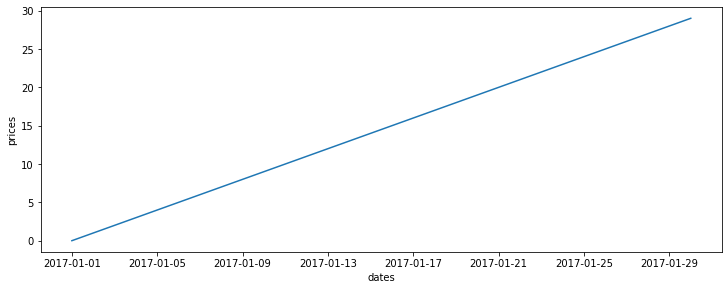

In [159]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index, df['Close'])
plt.xlabel('dates')
plt.ylabel('prices')

In [160]:
actions = {'buy':1, 'sell':-1, 'hold':0}
len(actions)

3

In [161]:
scaler = StandardScaler()
scaled_close = scaler.fit_transform(df[['Close']])
scaled_close.shape

(30, 1)

In [162]:
df.insert(1, 'Scaled_Close', scaled_close)

In [163]:
df.head()

,Close,Scaled_Close
Date,,
2017-01-01,0,-1.675247
2017-01-02,1,-1.559712
2017-01-03,2,-1.444178
2017-01-04,3,-1.328644
2017-01-05,4,-1.213110


In [164]:
df.shape

(30, 2)

Timestamp('2017-01-01 00:00:00')

In [62]:
! pip install keras-rl2
! pip install tensorflow

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

In [114]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(1,1)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1, 16)             32        
_________________________________________________________________
dense_29 (Dense)             (None, 1, 16)             272       
_________________________________________________________________
dense_30 (Dense)             (None, 1, 3)              51        
Total params: 355
Trainable params: 355
Non-trainable params: 0
_________________________________________________________________


array([[0.33004645, 0.3430555 , 0.32689804]], dtype=float32)

0.3430555

ValueError: Found array with dim 3. Estimator expected <= 2.

In [65]:
from rl.core import Env

In [66]:
class Environment(Env):

    def step(self, action):
        ''' Arguments
            ---------
            action (object): An action provided by the environment e.g. buy/sell/hold
            Returns
            -------
            observation (object): Agent's observation of the current environment.
            reward (float) : Amount of reward returned after previous action.
            done (boolean): Whether the episode has ended, in which case further step() calls will return undefined results.
            info (dict): Contains auxiliary diagnostic information (helpful for debugging, and sometimes learning).'''

            for price in df['Scaled_Close'].values:
                
        return observation, reward, done, info

    def reset(self):
        """ Resets the state of the environment and returns an initial observation.
            Returns
            observation (object): The initial observation of the space. Initial reward is assumed to be 0."""
        return observation
    
    def render(self, mode='human', close=False):
        pass

    def close(self):
        pass

In [172]:
for index, price in enumerate(df['Scaled_Close'].values, 1): # Start the enumeration at 1 so it equals the len(values)
    print(price, end=", ")
    print(index, len(df['Scaled_Close'].values))

-1.6752467319482305, 1 30
-1.5597124745724904, 2 30
-1.4441782171967503, 3 30
-1.3286439598210102, 4 30
-1.2131097024452704, 5 30
-1.0975754450695303, 6 30
-0.9820411876937902, 7 30
-0.8665069303180502, 8 30
-0.7509726729423102, 9 30
-0.6354384155665701, 10 30
-0.5199041581908301, 11 30
-0.4043699008150901, 12 30
-0.2888356434393501, 13 30
-0.17330138606361004, 14 30
-0.05776712868787001, 15 30
0.05776712868787001, 16 30
0.17330138606361004, 17 30
0.2888356434393501, 18 30
0.4043699008150901, 19 30
0.5199041581908301, 20 30
0.6354384155665701, 21 30
0.7509726729423102, 22 30
0.8665069303180502, 23 30
0.9820411876937902, 24 30
1.0975754450695303, 25 30
1.2131097024452704, 26 30
1.3286439598210102, 27 30
1.4441782171967503, 28 30
1.5597124745724904, 29 30
1.6752467319482305, 30 30
